# Машинное обучение c учителем

## Регрессия

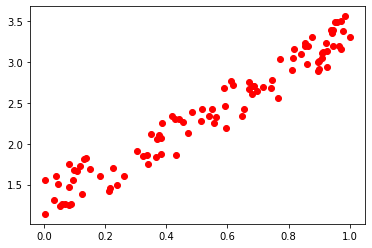

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num = 100
X = np.random.rand(num, 1)
y = 1 + 2*X + .6*np.random.rand(num, 1)

plt.figure()
plt.scatter(X, y, c='r')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.intercept_, reg.coef_)
print(reg.predict(np.array([[.5]])))

X_test = [0, 1]
y_test = reg.intercept_[0] + reg.coef_[0]*X_test

plt.figure()
plt.scatter(X, y, c='red')
plt.plot(X_test, y_test, c='black')
plt.show()

## ДЗ №1

1. Построить модель линейной регрессии для данных из файла data.csv

## Предобработка данных

### 1. Загрузка набора данных и уменьшение пространства признаков

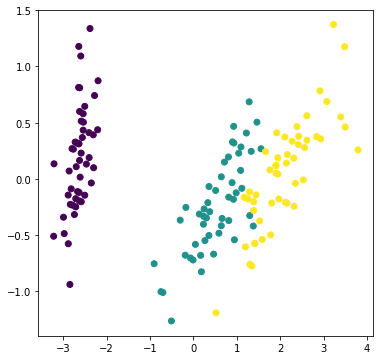

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris['data'])
y = iris['target']

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### 2. Нормализация данных

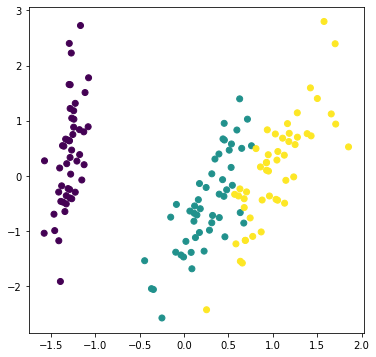

In [4]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_ = X_scale.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.show()

### 3. Разделение данных на обучающую и тренировочную выборки

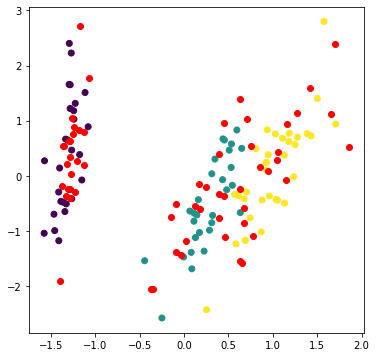

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.4)


plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
plt.show()

## Модели классификации

### 1. K ближайших соседей (KNN)

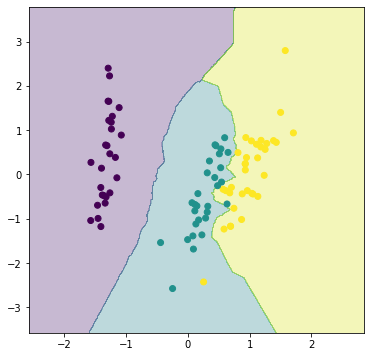

KNeighborsClassifier:  0.95


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=2).fit(X_train, y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('KNeighborsClassifier: ',
       accuracy_score(model.predict(X_test), y_test))

### 2. Дерево принятия решений

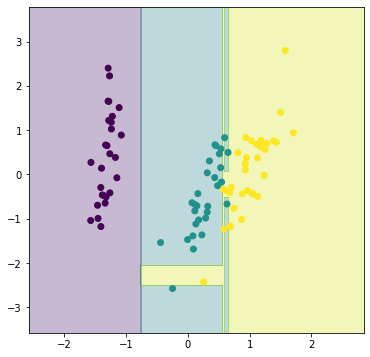

DecisionTreeClassifier:  0.9


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('DecisionTreeClassifier: ',
       accuracy_score(model.predict(X_test), y_test))

[Text(418.5, 757.1571428571428, 'X[0] <= -0.76\nentropy = 1.578\nsamples = 90\nvalue = [27, 29, 34]'),
 Text(334.8, 640.6714285714286, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(502.20000000000005, 640.6714285714286, 'X[0] <= 0.664\nentropy = 0.995\nsamples = 63\nvalue = [0, 29, 34]'),
 Text(418.5, 524.1857142857143, 'X[0] <= 0.558\nentropy = 0.533\nsamples = 33\nvalue = [0, 29, 4]'),
 Text(251.10000000000002, 407.7, 'X[1] <= -2.058\nentropy = 0.229\nsamples = 27\nvalue = [0, 26, 1]'),
 Text(167.4, 291.21428571428567, 'X[1] <= -2.504\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(83.7, 174.7285714285714, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 174.7285714285714, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(334.8, 291.21428571428567, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(585.9, 407.7, 'X[0] <= 0.59\nentropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(502.20000000000005, 291.21428571428567, 'ent

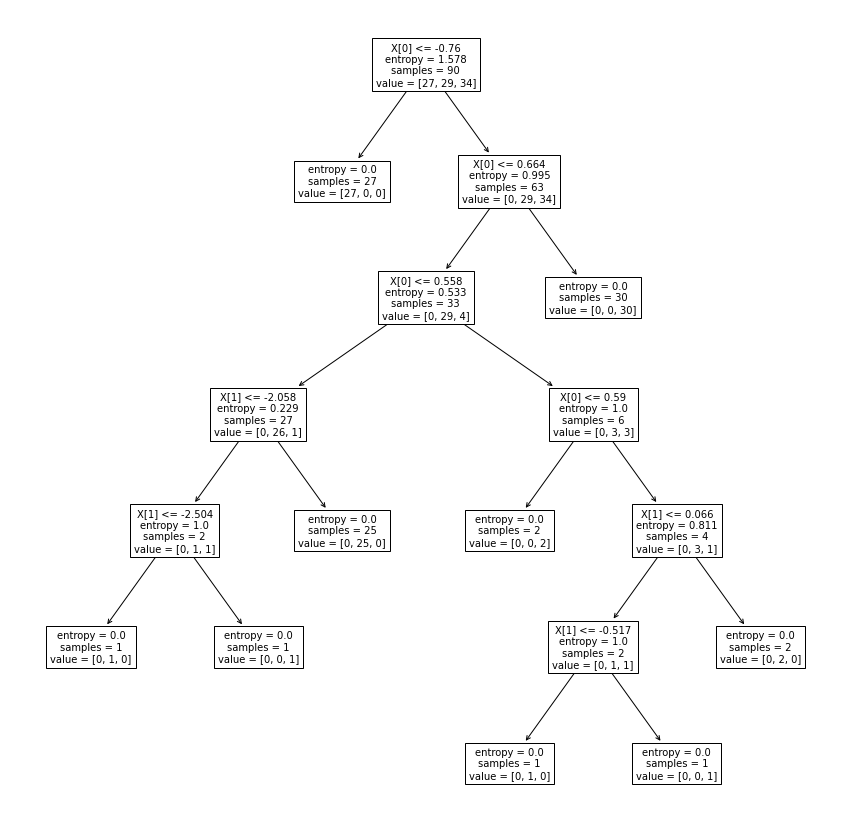

In [8]:
plt.figure(figsize=(15,15))
plot_tree(model, fontsize=10)

### 3. Случайный лес (Random Forest)

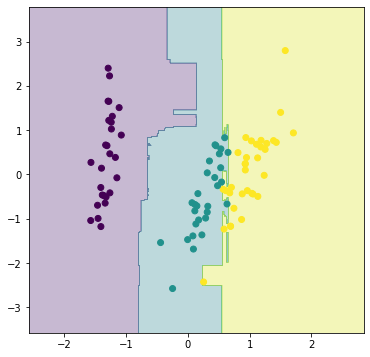

RandomForestClassifier:  0.9166666666666666


In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train,y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('RandomForestClassifier: ',
       accuracy_score(model.predict(X_test), y_test))


### 4. Метод опорных веторов (SVM)

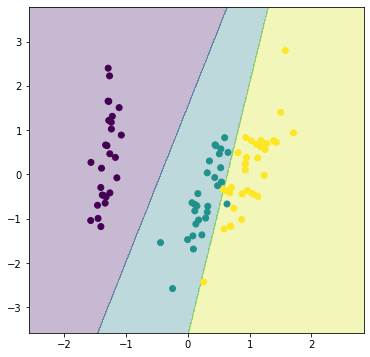

SVM:  0.95


In [10]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, gamma=.000001).fit(X_train,y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('SVM: ',
       accuracy_score(model.predict(X_test), y_test))

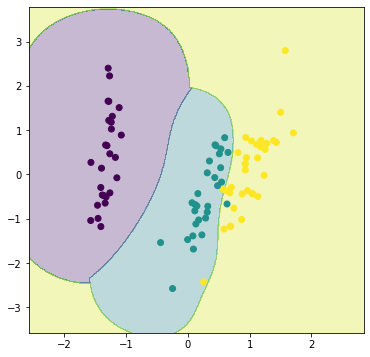

SVM:  0.9666666666666667


In [11]:

from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma=1).fit(X_train,y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('SVM: ',
       accuracy_score(model.predict(X_test), y_test))

### 5. Логистическая регрессия

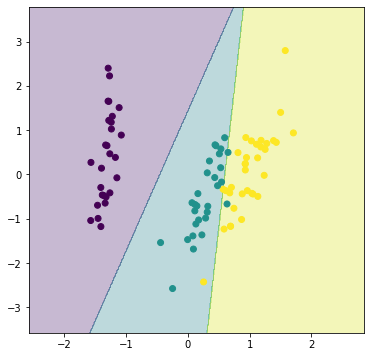

LogisticRegression:  0.95


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train,y_train)

plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('LogisticRegression: ',
       accuracy_score(model.predict(X_test), y_test))

### 6. Байесовский наивный классификатор

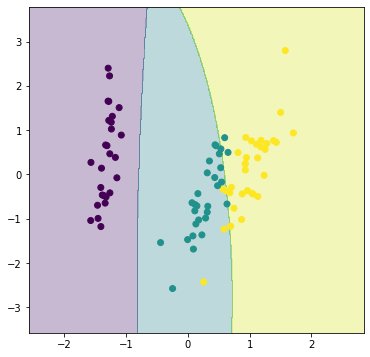

MultinomialNB:  0.9


In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train,y_train)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))


plt.figure(figsize=(6, 6))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

from sklearn.metrics import accuracy_score
print ('MultinomialNB: ',
       accuracy_score(model.predict(X_test), y_test))

## ДЗ №2

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

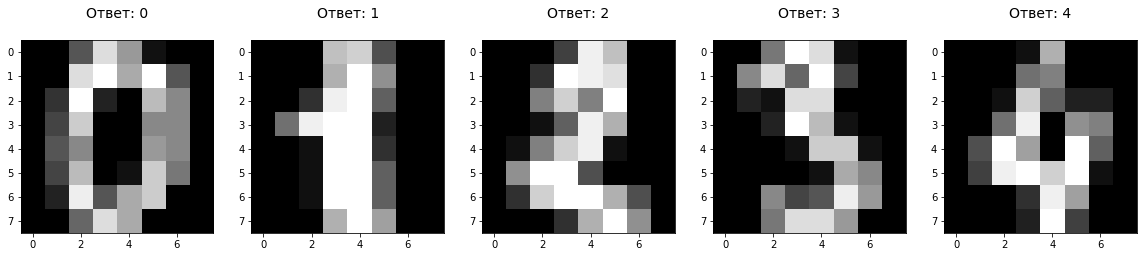

In [46]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Ответ: %i\n' % label, fontsize = 14)

## ДЗ №3

1. Подумайте, как с помощью кластеризации и классификации определить число на картинке:



In [1]:
![image.png](attachment:image.png)

"[image.png]" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
